In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re  # used for pattern matching and text manipulation.
import string 
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [8]:
train_path = 'train_data.txt'
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE","GENRE","DESCRIPTION"], engine="python")

In [10]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [13]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [14]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [15]:
test_path = 'test_data.txt'
test_data = pd.read_csv(train_path, sep=':::', names=["ID","TITLE","DESCRIPTION"], engine="python")

In [16]:
test_data

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   TITLE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


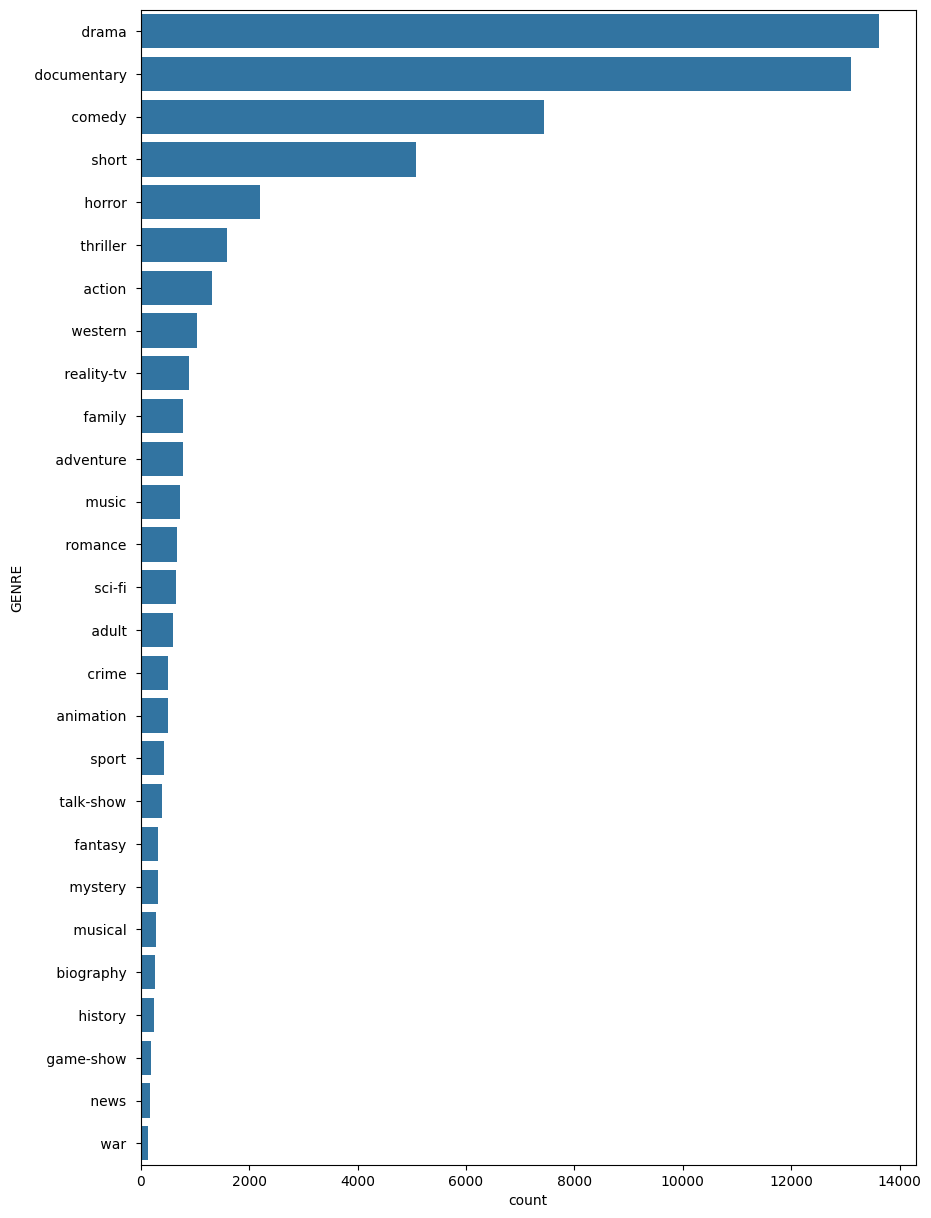

In [18]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index)
plt.show()

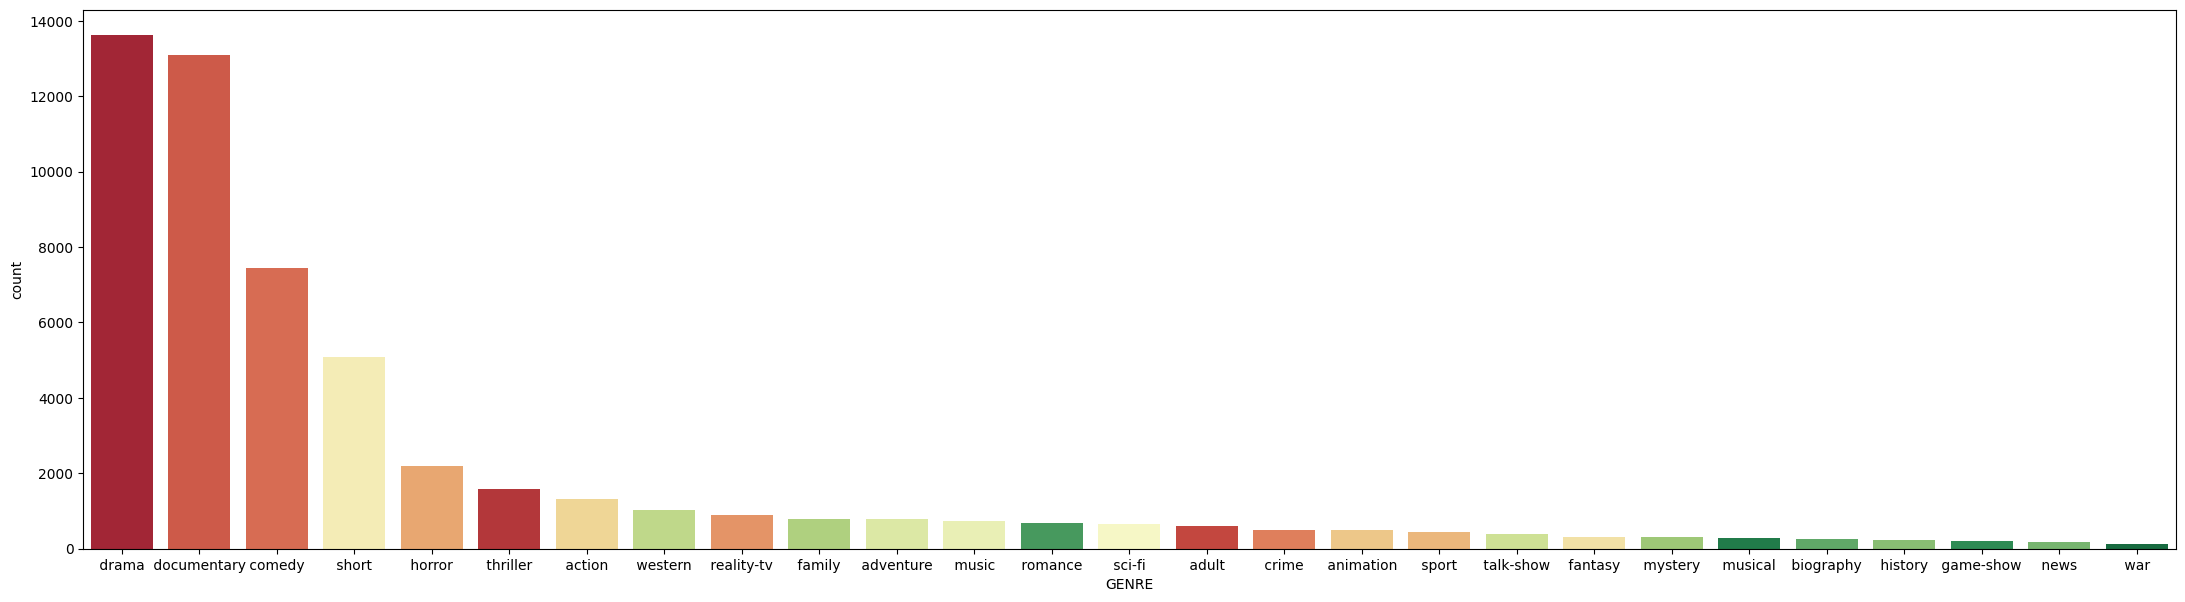

In [22]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order=train_data["GENRE"].value_counts().index, palette="RdYlGn", hue="GENRE", legend=False)
plt.show()

In [27]:
nltk.download('stopwords')
nltk.download()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
# Initialize stemmer and stopwords
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'@\S+', '', text)  # Remove @mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\.pic\S+', '', text)  # Remove .pic URLs
    text = re.sub(r'[^a-zA-Z\s+]', '', text)  # Remove non-alphabetic characters except spaces
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenize text into words
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]  # Stem words and remove stopwords
    cleaned_text = " ".join(words)  # Join cleaned words back into a string
    return cleaned_text.strip()  # Strip leading and trailing spaces

# Apply cleaning_data function to DESCRIPTION column in both train_data and test_data
train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [29]:
train_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct par yearold osc learn nobody...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd rel murd ...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat hist littl ...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl ref unrecov body ground zero also st...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,shortl nbc liv sitcom cent bonino worldfam con...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next gen exploit sist kap bay sor hous mystery...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",besta echt standup comedy grow fac fear fre or...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walt viv liv country difficult tim keep serv w...


In [30]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])

In [31]:
X = X_train
y = train_data["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [33]:
model.score(X_train,Y_train)

0.8894883678033709

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([' drama ', ' drama ', ' comedy ', ..., ' drama ', ' drama ',
       ' horror '], dtype=object)

In [36]:
accuracy = accuracy_score(Y_test,y_pred)
print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.5700451904454487
